In [1]:
import pandas as pd
import numpy as np
import arviz as az

In [2]:
df = pd.read_excel(r'C:\Users\rramr\OneDrive\Desktop\Modern Scientist Global\dataset\renamedfeb21bayesian.xlsx')

In [3]:
df.head()

,id,status_1983,status_1984,status_1986,status_201213,sexr1,maternal_skin_color_r1,maternal_schooling_r1,monthly_family_income_mw_1_r1,monthly_family_income_q_r1,...,no_of_bathrooms_r5,no_of_bathroom_shower_r5,pieces_for_sleep_r5,employment_sector_r5,type_of_job_r5,ISIC labour categories_r5,ISIC labour categories_r5.1,Paternal_age_2004,Age_at_2004_5,Height_adult
0,0,with weight information,with weight information,with weight information,Yes,1.0,black,8.0,1.1 to 3,3,...,1.0,1.0,2.0,navy military,administrative,Public administration and defence; compulsory ...,1.0,56.0,23.008898,180.65
1,1,without weight information,with weight information,with weight information,Yes,1.0,black,5.0,1.1 to 3,2,...,1.0,1.0,2.0,public road transport,bus driver,Transportation and storage,0.0,39.0,23.285421,180.35
2,2,with weight information,with weight information,with weight information,Yes,0.0,white,5.0,1.1 to 3,3,...,1.0,1.0,2.0,dental center,auxiliary secretary,Administrative and support service activities,1.0,NaN,NaN,164.95
3,3,with weight information,with weight information,with weight information,Yes,1.0,black,9.0,1 or less,2,...,1.0,1.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,182.30
4,4,without weight information,without weight information,without weight information,No,1.0,white,15.0,10,5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
from scipy import stats
import scipy.stats as stats

In [5]:
df['score_waisiii_iq_zscore_r5']=stats.zscore(df.score_waisiii_iq_r5,nan_policy='omit')

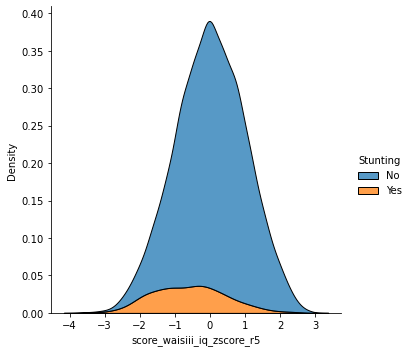

In [6]:
import seaborn as sns
sns.displot(df, x="score_waisiii_iq_zscore_r5", hue="Stunting", kind="kde", multiple="stack")


In [7]:
df2=df.copy()

In [8]:
df2 = pd.get_dummies(df2, columns=['Stunting'],dummy_na=True)

In [9]:
Y=df2['score_waisiii_iq_zscore_r5']

In [10]:
X=df2[['score_waisiii_iq_zscore_r5','Stunting_Yes'
]]

In [11]:
from sklearn.model_selection import train_test_split
# df is features and labels are the targets 
# Split by putting 25% in the testing set
X_train, X_test,Y_train, Y_test = train_test_split(X,  Y,
                                                   test_size = 0.25,
                                                    random_state=42)

In [12]:
X_train.head()

,score_waisiii_iq_zscore_r5,Stunting_Yes
2173,0.319669,0
1617,0.716589,0
411,NaN,0
3570,0.557821,0
1844,NaN,0


In [13]:
formula = 'score_waisiii_iq_zscore_r5 ~ ' + ' + '.join(['%s' % variable for variable in X_train.columns[1:]])
formula

'score_waisiii_iq_zscore_r5 ~ Stunting_Yes'

In [15]:
import pymc3 as pm

# Context for the model
with pm.Model() as linear_model:
    # Intercept
    intercept = pm.Normal('Intercept', mu = 0, sd = 100)
    
    # Slope 
    slope = pm.Normal('slope', mu = 0, sd = 1)
    
    # Standard deviation
    sigma = pm.HalfNormal('sigma', sd = 10)
    
    # Estimate of mean
    mean = intercept + slope * X_train.loc[:, 'Stunting_Yes']
    
    # Observed values
    Y_obs = pm.Normal('Y_obs', mu = mean, sd = sigma, observed = Y_train.values)
    
    # Sampler
    step = pm.NUTS()

    # Posterior distribution
    linear_trace = pm.sample(2500, step)

C:\Users\rramr\Anaconda4\lib\site-packages\pymc3\model.py:1754: ImputationWarning: Data in Y_obs contains missing values and will be automatically imputed from the sampling distribution.
  warnings.warn(impute_message, ImputationWarning)
C:\Users\rramr\Anaconda4\lib\site-packages\pymc3\sampling.py:466: FutureWarning: In an upcoming release, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  warnings.warn(
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [Y_obs_missing, sigma, slope, Intercept]


Sampling 4 chains for 1_000 tune and 2_500 draw iterations (4_000 + 10_000 draws total) took 40 seconds.


C:\Users\rramr\Anaconda4\lib\site-packages\arviz\data\io_pymc3.py:88: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(


array([[<AxesSubplot:title={'center':'Intercept'}>,
        <AxesSubplot:title={'center':'Intercept'}>],
       [<AxesSubplot:title={'center':'Stunting_Yes'}>,
        <AxesSubplot:title={'center':'Stunting_Yes'}>],
       [<AxesSubplot:title={'center':'age_m_r4'}>,
        <AxesSubplot:title={'center':'age_m_r4'}>],
       [<AxesSubplot:title={'center':'sexr1'}>,
        <AxesSubplot:title={'center':'sexr1'}>],
       [<AxesSubplot:title={'center':'Age_gap_r1'}>,
        <AxesSubplot:title={'center':'Age_gap_r1'}>],
       [<AxesSubplot:title={'center':'maternal_schooling_r1'}>,
        <AxesSubplot:title={'center':'maternal_schooling_r1'}>],
       [<AxesSubplot:title={'center':'no_of_household_members_r3'}>,
        <AxesSubplot:title={'center':'no_of_household_members_r3'}>],
       [<AxesSubplot:title={'center':'household_assets_index_r3'}>,
        <AxesSubplot:title={'center':'household_assets_index_r3'}>],
       [<AxesSubplot:title={'center':'sd'}>,
        <AxesSubplot:title=

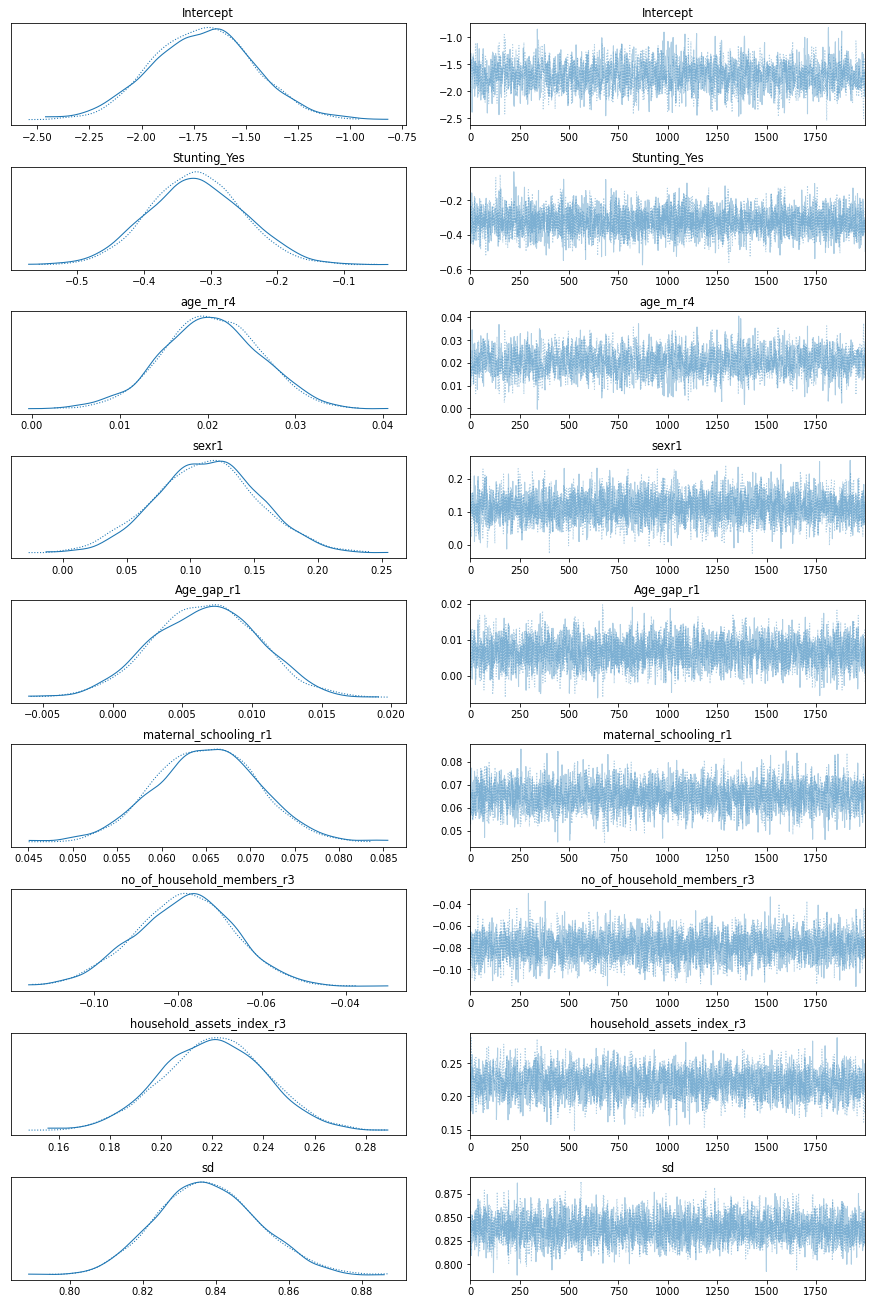

In [16]:
az.plot_trace(normal_trace)

In [16]:
az.summary(linear_trace)


C:\Users\rramr\Anaconda4\lib\site-packages\arviz\data\io_pymc3.py:88: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(


,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_mean,ess_sd,ess_bulk,ess_tail,r_hat
Intercept,0.049,0.020,0.012,0.086,0.000,0.000,10669.0,9872.0,10675.0,7111.0,1.0
slope,-0.675,0.067,-0.806,-0.555,0.001,0.000,10452.0,10377.0,10447.0,7415.0,1.0
Y_obs_missing[0],0.062,0.957,-1.676,1.912,0.009,0.012,10973.0,3198.0,10964.0,6079.0,1.0
Y_obs_missing[1],0.042,0.994,-1.711,1.979,0.009,0.012,11200.0,3317.0,11206.0,5805.0,1.0
Y_obs_missing[2],0.044,0.979,-1.815,1.871,0.010,0.013,10345.0,2799.0,10388.0,5048.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
Y_obs_missing[1725],0.085,0.992,-1.712,2.020,0.009,0.013,11714.0,3044.0,11695.0,5371.0,1.0
Y_obs_missing[1726],0.051,0.992,-1.823,1.879,0.010,0.014,10365.0,2563.0,10400.0,4436.0,1.0
Y_obs_missing[1727],0.054,0.967,-1.706,1.915,0.009,0.012,11945.0,3007.0,11959.0,5592.0,1.0
Y_obs_missing[1728],0.062,0.974,-1.761,1.887,0.009,0.012,10601.0,3183.0,10603.0,5774.0,1.0


C:\Users\rramr\Anaconda4\lib\site-packages\arviz\data\io_pymc3.py:88: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(


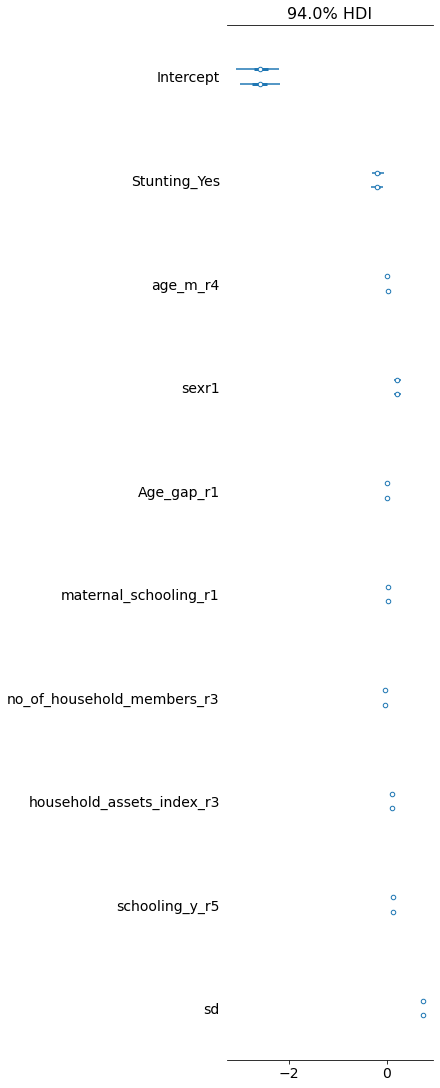

In [164]:
az.plot_forest(normal_trace);

C:\Users\rramr\Anaconda4\lib\site-packages\arviz\data\io_pymc3.py:88: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(


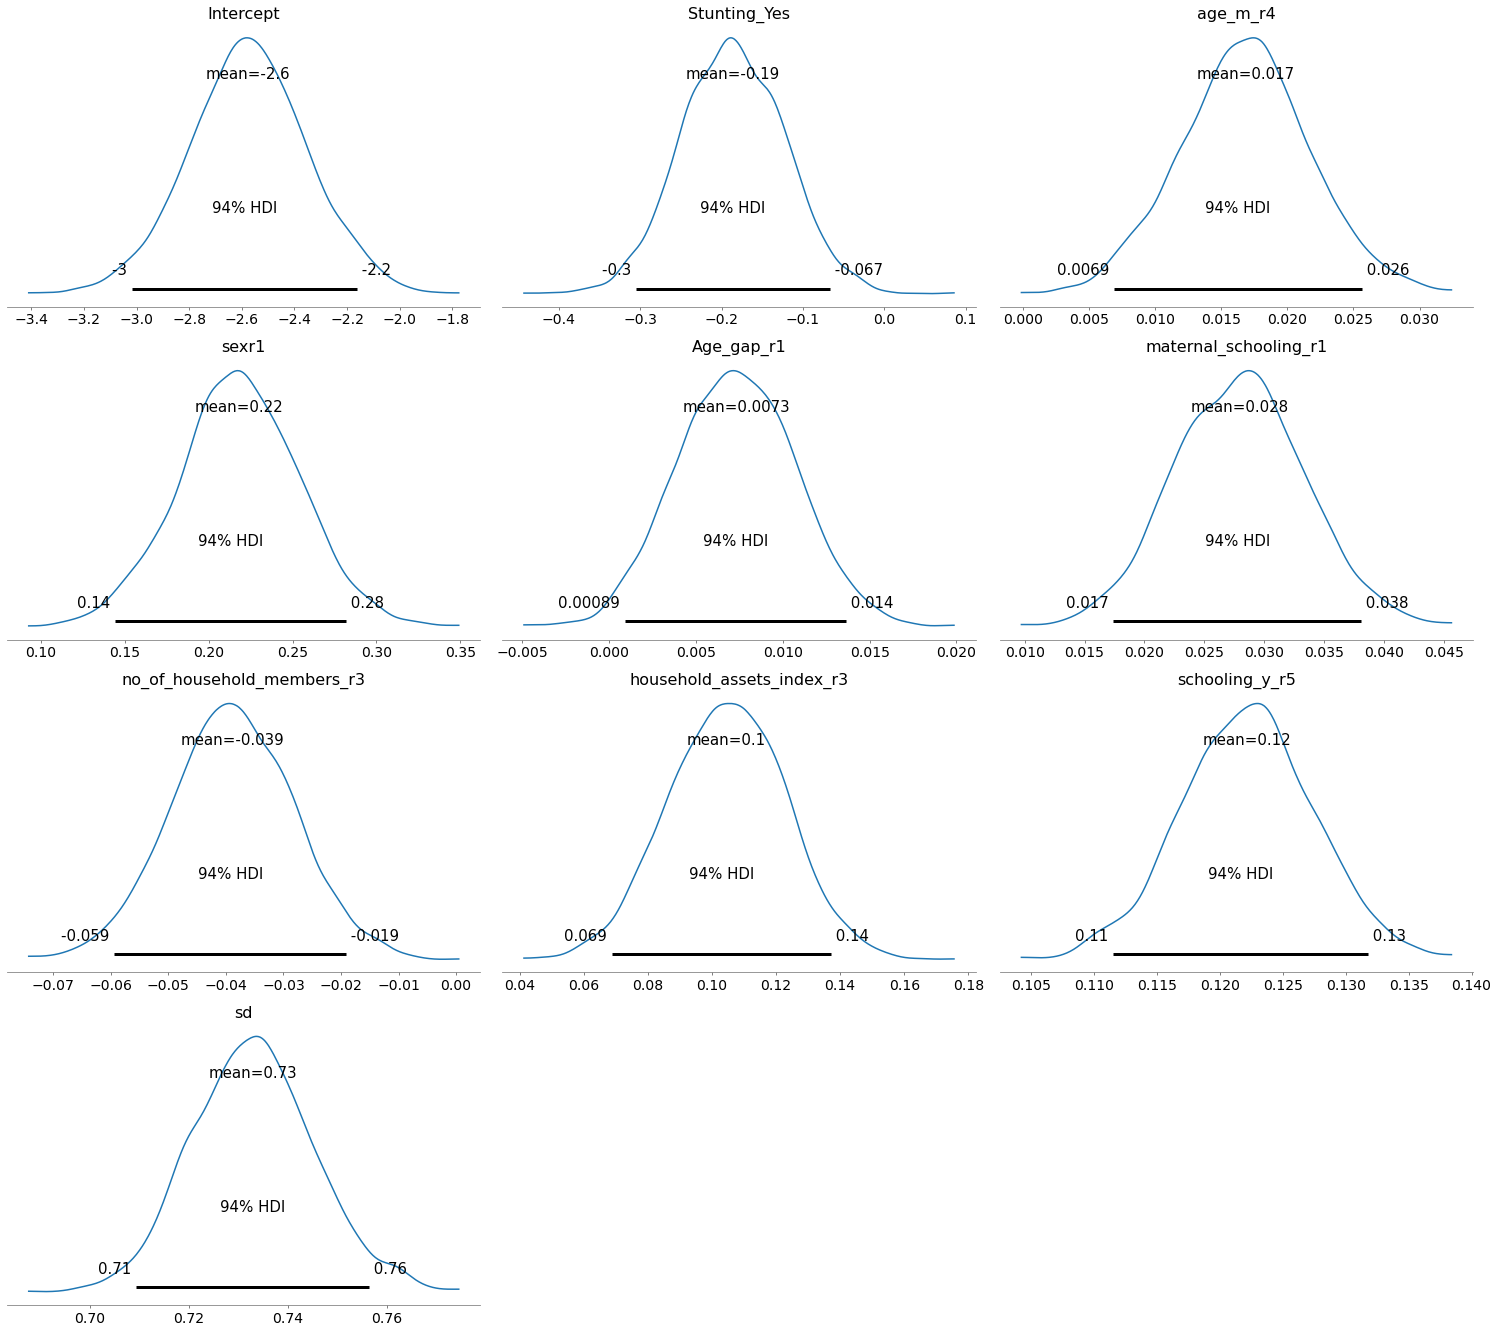

In [135]:
az.plot_posterior(normal_trace);

In [165]:
for variable in normal_trace.varnames:
    print('Variable: {:15} Mean weight in model: {:.4f}'.format(variable, 
                                                                np.mean(normal_trace[variable])))

Variable: Intercept       Mean weight in model: -2.5759
Variable: Stunting_Yes    Mean weight in model: -0.1865
Variable: age_m_r4        Mean weight in model: 0.0168
Variable: sexr1           Mean weight in model: 0.2182
Variable: Age_gap_r1      Mean weight in model: 0.0073
Variable: maternal_schooling_r1 Mean weight in model: 0.0279
Variable: no_of_household_members_r3 Mean weight in model: -0.0389
Variable: household_assets_index_r3 Mean weight in model: 0.1045
Variable: schooling_y_r5  Mean weight in model: 0.1222
Variable: sd_log__        Mean weight in model: -0.3108
Variable: sd              Mean weight in model: 0.7330


In [171]:
# Examines the effect of changing a single variable
# Takes in the name of the variable, the trace, and the data
def model_effect(query_var, trace, X):
    
    # Variables that do not change
    steady_vars = list(X.columns)
    steady_vars.remove(query_var)
    
    # Linear Model that estimates a grade based on the value of the query variable 
    # and one sample from the trace
    def lm(value, sample):
        
        # Prediction is the estimate given a value of the query variable
        prediction = sample['Intercept'] + sample[query_var] * value
        
        # Each non-query variable is assumed to be at the median value
        for var in steady_vars:
            
            # Multiply the weight by the median value of the variable
            prediction += sample[var] * X[var].median()
        
        return prediction
    
    
    
    # Find the minimum and maximum values for the range of the query var
    var_min = X[query_var].min()
    var_max = X[query_var].max()
    
    # Plot the estimated grade versus the range of query variable
    pm.plot_posterior_predictive_glm(trace, eval=np.linspace(var_min, var_max, 100), 
                                     lm=lm, samples=100, color='blue', 
                                     alpha = 0.4, lw = 2)
    
    # Plot formatting
    plt.xlabel('%s' % query_var, size = 16)
    plt.ylabel('Cognition Z', size = 16)
    plt.title("Posterior of Cognition  vs %s" % query_var, size = 18)
    plt.show()

# Model Variable Effects

 If we want to see the effect of changing one variable while holding the others constant, we can use the function pm.plot_posterior_predictive_glm. This takes a range of values to use for the variable, a linear model, and a number of samples. The function evaluates the linear model across the range of values for the number of samples. Each time, it draws a different set of parameters from the trace. This gives us an indication of the effect of a single variable and also the uncertainty in the model estimates. To see the effect of a single variable, we hold the others constant at their median values.

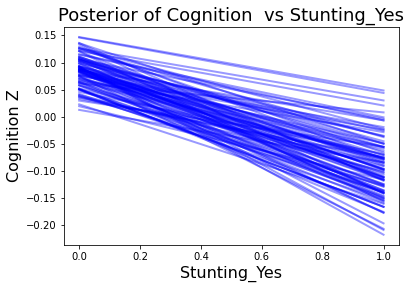

In [172]:
model_effect('Stunting_Yes', normal_trace, X_train.drop(columns='score_waisiii_iq_zscore_r5'))
